### Подключение библиотек и скриптов

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:72.5% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix, coo_matrix
from sklearn.metrics.pairwise import pairwise_distances

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Пути к директориям и файлам

In [5]:
# links_path = '../data/links.csv'
movies_path = '../data/movies.csv'
ratings_path = '../data/ratings.csv'
# tags_path = '../data/tags.csv'

### Загрузка данных

In [6]:
# links_ds = pd.read_csv(links_path)
movies_ds = pd.read_csv(movies_path)
ratings_ds = pd.read_csv(ratings_path)
# tags_ds = pd.read_csv(tags_path)

### Изучение датасета

In [7]:
movies_ds.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies_ds.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [9]:
movies_ds.title.nunique()

9737

In [10]:
movies_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [11]:
ratings_ds.head()

,userId,movieId,rating,timestamp
0,1,1,4.00000,964982703
1,1,3,4.00000,964981247
2,1,6,4.00000,964982224
3,1,47,5.00000,964983815
4,1,50,5.00000,964982931


In [12]:
ratings_ds.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.00000,1493848402
100832,610,168248,5.00000,1493850091
100833,610,168250,5.00000,1494273047
100834,610,168252,5.00000,1493846352
100835,610,170875,3.00000,1493846415


In [13]:
ratings_ds.userId.nunique()

610

In [14]:
ratings_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Количественные переменные

In [15]:
movies_ds.describe()

,movieId
count,9742.00000
mean,42200.35362
std,52160.49485
min,1.00000
25%,3248.25000
50%,7300.00000
75%,76232.00000
max,193609.00000


In [16]:
ratings_ds.describe()

,userId,movieId,rating,timestamp
count,100836.00000,100836.00000,100836.00000,100836.00000
mean,326.12756,19435.29572,3.50156,1205946087.36847
std,182.61849,35530.98720,1.04253,216261035.99513
min,1.00000,1.00000,0.50000,828124615.00000
25%,177.00000,1199.00000,3.00000,1019123866.00000
50%,325.00000,2991.00000,3.50000,1186086662.00000
75%,477.00000,8122.00000,4.00000,1435994144.50000
max,610.00000,193609.00000,5.00000,1537799250.00000


###  Обработка выбросов и пропусков

In [17]:
movies_ds.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [18]:
ratings_ds.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Работа с признаками

In [19]:
data = pd.merge(movies_ds, ratings_ds, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.00000,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.00000,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.50000,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.50000,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.50000,1305696483


In [20]:
# drop 'timestamp'
data = data[['userId','movieId', 'title', 'genres', 'rating']]

data.sort_values(['userId', 'movieId'], inplace=True)

data.reset_index(drop=True, inplace=True)

In [21]:
data.head()

,userId,movieId,title,genres,rating
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.00000
1,1,3,Grumpier Old Men (1995),Comedy|Romance,4.00000
2,1,6,Heat (1995),Action|Crime|Thriller,4.00000
3,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.00000
4,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.00000


In [22]:
data.tail()

,userId,movieId,title,genres,rating
100831,610,166534,Split (2017),Drama|Horror|Thriller,4.00000
100832,610,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,5.00000
100833,610,168250,Get Out (2017),Horror,5.00000
100834,610,168252,Logan (2017),Action|Sci-Fi,5.00000
100835,610,170875,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,3.00000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   title    100836 non-null  object 
 3   genres   100836 non-null  object 
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


### Визуализация данных

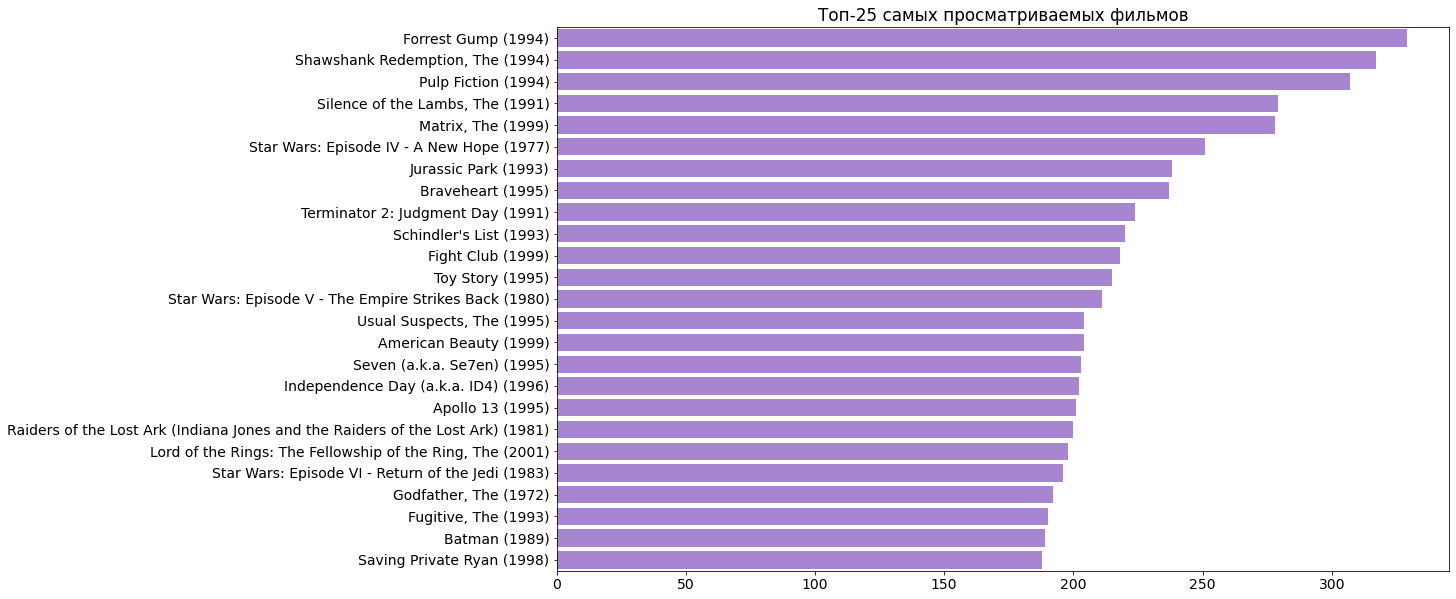

In [24]:
movie_raiting = data.groupby('title')['title'].count().sort_values(ascending=False).head(25)

plt.figure(figsize=(16, 10))
sns.barplot(y = movie_raiting.index, x = movie_raiting.values, color='#a678de')

plt.ylabel('')
plt.title('Топ-25 самых просматриваемых фильмов')
plt.show()

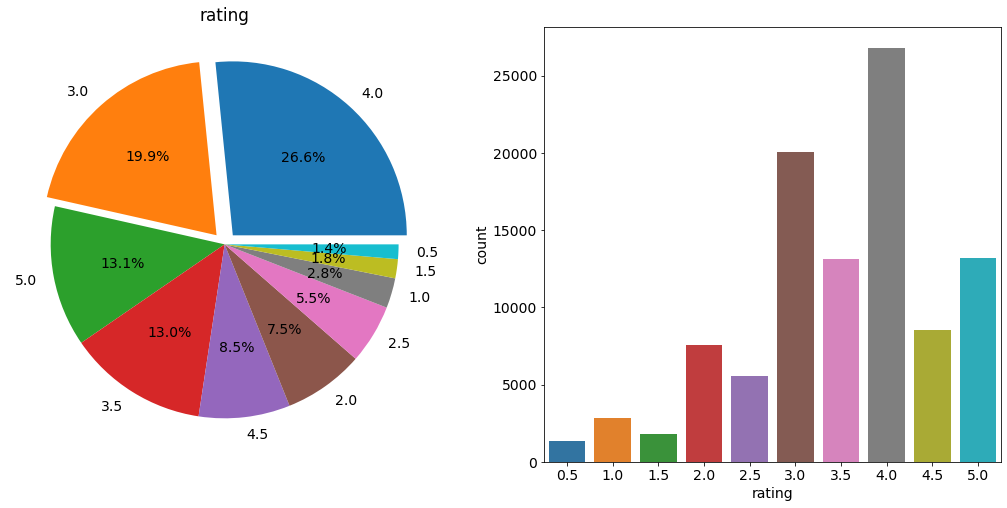

In [25]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
explode = (0.07, 0.07, 0, 0, 0, 0, 0, 0, 0, 0)
data['rating'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('rating')
ax[0].set_ylabel('')
sns.countplot('rating', data=data, ax=ax[1])
plt.show()

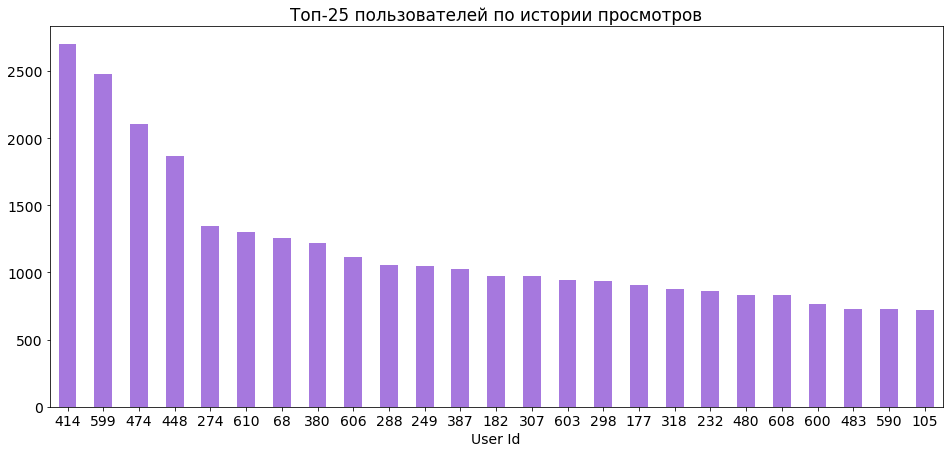

In [26]:
user_rating = data.groupby('userId')['title'].count().sort_values(ascending=False).head(25)

plt.figure(figsize=(16, 7))
user_rating.plot(kind='bar', color='#a678de')
plt.title('Топ-25 пользователей по истории просмотров')
plt.xlabel('User Id')
plt.xticks(rotation=0)
plt.show()

### Popularity-based recommendation

In [27]:
def popularity_recommendation(data, n):
    """Топ-n популярных фильмов"""
    
    movie_raiting = data.groupby('title')['title'].count().sort_values(ascending=False).head(n)
#     recs = movie_raiting.index
    recs = movie_raiting
    
#     return recs.tolist()
    return recs

In [28]:
%%time
popular_recs = popularity_recommendation(data, n=25)

Wall time: 34 ms


In [29]:
popular_recs

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

### User Based Recommendation

In [30]:
dummy_train = data.copy()
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [31]:
dummy_train = dummy_train.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(1)

In [32]:
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,55,57,58,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,92,93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,110,111,112,113,116,117,118,119,121,122,123,125,126,128,129,132,135,137,140,141,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,222,223,224,225,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,265,266,267,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,287,288,...,170401,170411,170551,170597,170697,170705,170777,170813,170817,170827,170837,170875,170897,170907,170937,170939,170945,170957,170993,171011,171023,171251,171495,171631,171695,171701,171749,171751,171759,171763,171765,171811,171867,171891,171917,172013,172215,172229,172233,172253,172321,172461,172497,172547,172577,172583,172585,172587,172589,172591,172637,172705,172793,172825,172875,172881,172887,172909,173145,173197,173205,173209,173235,173253,173255,173291,173307,173317,173351,173355,173535,173619,173751,173873,173925,173941,173963,174045,174053,174055,174141,174403,174479,174551,174681,174727,174737,174815,174909,175197,175199,175293,175303,175387,175397,175401,175431,175435,175475,175485,175569,175577,175585,175661,175693,175705,175707,175743,175781,176051,176101,176329,176371,176389,176413,176415,176419,176423,176579,176601,176621,176751,176805,176935,177185,177285,177593,177615,177763,177765,177939,178061,178111,178129,178323,178613,178615,178827,179053,179073,179119,179133,179135,179211,179401,179427,179491,179511,179709,179749,179813,179815,179817,179819,179953,180031,180045,180095,180231,180263,180265,180297,180497,180777,180985,180987,181065,181139,181315,181413,181659,181719,182293,182297,182299,182639,182715,182727,182731,182749,182793,182823,183011,183197,183199,183227,183295,183301,183317,183611,183635,183897,183911,183959,184015,184053,184245,184253,184257,184349,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1

In [33]:
# user_item_matrix = data.pivot(index='userId',
#                               columns='movieId',
#                               values='rating'
# #                               aggfunc='count', 
# #                               fill_value=0
#                              ).fillna(0)

# # user_item_matrix[user_item_matrix > 0] = 1 
# # user_item_matrix = user_item_matrix.astype(float) # for implicit

# # # sparse matrix
# # sparse_user_item = csr_matrix(user_item_matrix).tocsr()

# user_item_matrix.head()

In [34]:
# user_item_matrix.shape

In [35]:
# user_correlation = 1 - pairwise_distances(user_item_matrix, metric='cosine')
# user_correlation[np.isnan(user_correlation)] = 0
# print(user_correlation)

In [36]:
# user_correlation.shape

In [37]:
movie_features = data.pivot(index='userId', 
                             columns='movieId',
                             values='rating'
                            )

In [38]:
movie_features.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,55,57,58,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,92,93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,110,111,112,113,116,117,118,119,121,122,123,125,126,128,129,132,135,137,140,141,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,222,223,224,225,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,265,266,267,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,287,288,...,170401,170411,170551,170597,170697,170705,170777,170813,170817,170827,170837,170875,170897,170907,170937,170939,170945,170957,170993,171011,171023,171251,171495,171631,171695,171701,171749,171751,171759,171763,171765,171811,171867,171891,171917,172013,172215,172229,172233,172253,172321,172461,172497,172547,172577,172583,172585,172587,172589,172591,172637,172705,172793,172825,172875,172881,172887,172909,173145,173197,173205,173209,173235,173253,173255,173291,173307,173317,173351,173355,173535,173619,173751,173873,173925,173941,173963,174045,174053,174055,174141,174403,174479,174551,174681,174727,174737,174815,174909,175197,175199,175293,175303,175387,175397,175401,175431,175435,175475,175485,175569,175577,175585,175661,175693,175705,175707,175743,175781,176051,176101,176329,176371,176389,176413,176415,176419,176423,176579,176601,176621,176751,176805,176935,177185,177285,177593,177615,177763,177765,177939,178061,178111,178129,178323,178613,178615,178827,179053,179073,179119,179133,179135,179211,179401,179427,179491,179511,179709,179749,179813,179815,179817,179819,179953,180031,180045,180095,180231,180263,180265,180297,180497,180777,180985,180987,181065,181139,181315,181413,181659,181719,182293,182297,182299,182639,182715,182727,182731,182749,182793,182823,183011,183197,183199,183227,183295,183301,183317,183611,183635,183897,183911,183959,184015,184053,184245,184253,184257,184349,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.00000,NaN,4.00000,NaN,NaN,4.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,3.00000,NaN,NaN,N

In [39]:
movie_features.shape

(610, 9724)

In [40]:
mean = np.nanmean(movie_features, axis=1)
print(mean.shape)

(610,)


In [41]:
subtracted = (movie_features.T - mean).T
subtracted.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,55,57,58,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,92,93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,110,111,112,113,116,117,118,119,121,122,123,125,126,128,129,132,135,137,140,141,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,222,223,224,225,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,265,266,267,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,287,288,...,170401,170411,170551,170597,170697,170705,170777,170813,170817,170827,170837,170875,170897,170907,170937,170939,170945,170957,170993,171011,171023,171251,171495,171631,171695,171701,171749,171751,171759,171763,171765,171811,171867,171891,171917,172013,172215,172229,172233,172253,172321,172461,172497,172547,172577,172583,172585,172587,172589,172591,172637,172705,172793,172825,172875,172881,172887,172909,173145,173197,173205,173209,173235,173253,173255,173291,173307,173317,173351,173355,173535,173619,173751,173873,173925,173941,173963,174045,174053,174055,174141,174403,174479,174551,174681,174727,174737,174815,174909,175197,175199,175293,175303,175387,175397,175401,175431,175435,175475,175485,175569,175577,175585,175661,175693,175705,175707,175743,175781,176051,176101,176329,176371,176389,176413,176415,176419,176423,176579,176601,176621,176751,176805,176935,177185,177285,177593,177615,177763,177765,177939,178061,178111,178129,178323,178613,178615,178827,179053,179073,179119,179133,179135,179211,179401,179427,179491,179511,179709,179749,179813,179815,179817,179819,179953,180031,180045,180095,180231,180263,180265,180297,180497,180777,180985,180987,181065,181139,181315,181413,181659,181719,182293,182297,182299,182639,182715,182727,182731,182749,182793,182823,183011,183197,183199,183227,183295,183301,183317,183611,183635,183897,183911,183959,184015,184053,184245,184253,184257,184349,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.36638,NaN,-0.36638,NaN,NaN,-0.36638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63362,NaN,NaN,0.63362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.36638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.36638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63362,NaN,NaN,NaN,NaN,NaN,0.63362,NaN,NaN,NaN,NaN,NaN,0.63362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63362,NaN,NaN,NaN,NaN,NaN,-1.36638,NaN

In [42]:
subtracted.shape

(610, 9724)

In [43]:
user_correlation = 1 - pairwise_distances(subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.00000000e+00  1.26451574e-03  5.52577176e-04 ...  7.52238457e-02
  -2.57125541e-02  1.09323166e-02]
 [ 1.26451574e-03  1.00000000e+00  0.00000000e+00 ... -6.00082818e-03
  -6.00909967e-02  2.49992083e-02]
 [ 5.52577176e-04  0.00000000e+00  1.00000000e+00 ... -1.30006374e-02
   0.00000000e+00  1.95499646e-02]
 ...
 [ 7.52238457e-02 -6.00082818e-03 -1.30006374e-02 ...  1.00000000e+00
   5.07144903e-02  5.44538770e-02]
 [-2.57125541e-02 -6.00909967e-02  0.00000000e+00 ...  5.07144903e-02
   1.00000000e+00 -1.24714266e-02]
 [ 1.09323166e-02  2.49992083e-02  1.95499646e-02 ...  5.44538770e-02
  -1.24714266e-02  1.00000000e+00]]


In [44]:
user_correlation.shape

(610, 610)

### Predict Model

In [45]:
user_correlation[user_correlation < 0] = 0
user_correlation

array([[1.00000000e+00, 1.26451574e-03, 5.52577176e-04, ...,
        7.52238457e-02, 0.00000000e+00, 1.09323166e-02],
       [1.26451574e-03, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.49992083e-02],
       [5.52577176e-04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.95499646e-02],
       ...,
       [7.52238457e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.07144903e-02, 5.44538770e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.07144903e-02, 1.00000000e+00, 0.00000000e+00],
       [1.09323166e-02, 2.49992083e-02, 1.95499646e-02, ...,
        5.44538770e-02, 0.00000000e+00, 1.00000000e+00]])

In [46]:
user_predicted_ratings = np.dot(user_correlation, movie_features.fillna(0))
user_predicted_ratings

array([[2.62810560e+01, 9.52342240e+00, 9.30078982e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.49521814e-03],
       [3.47835235e+00, 1.36683598e+00, 3.43848735e-01, ...,
        5.49613247e-02, 5.49613247e-02, 0.00000000e+00],
       [2.46019320e+00, 1.35134102e+00, 2.74969070e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07967747e+01, 2.04701607e+01, 1.10611143e+01, ...,
        9.06624843e-03, 9.06624843e-03, 0.00000000e+00],
       [3.49171218e+01, 1.63880849e+01, 6.61858521e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.69487399e-01],
       [4.46675112e+01, 2.09479288e+01, 7.89198996e+00, ...,
        1.62415565e-01, 1.62415565e-01, 6.86398904e-01]])

In [47]:
user_predicted_ratings.shape

(610, 9724)

In [48]:
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)
user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,55,57,58,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,92,93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,110,111,112,113,116,117,118,119,121,122,123,125,126,128,129,132,135,137,140,141,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,222,223,224,225,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,265,266,267,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,287,288,...,170401,170411,170551,170597,170697,170705,170777,170813,170817,170827,170837,170875,170897,170907,170937,170939,170945,170957,170993,171011,171023,171251,171495,171631,171695,171701,171749,171751,171759,171763,171765,171811,171867,171891,171917,172013,172215,172229,172233,172253,172321,172461,172497,172547,172577,172583,172585,172587,172589,172591,172637,172705,172793,172825,172875,172881,172887,172909,173145,173197,173205,173209,173235,173253,173255,173291,173307,173317,173351,173355,173535,173619,173751,173873,173925,173941,173963,174045,174053,174055,174141,174403,174479,174551,174681,174727,174737,174815,174909,175197,175199,175293,175303,175387,175397,175401,175431,175435,175475,175485,175569,175577,175585,175661,175693,175705,175707,175743,175781,176051,176101,176329,176371,176389,176413,176415,176419,176423,176579,176601,176621,176751,176805,176935,177185,177285,177593,177615,177763,177765,177939,178061,178111,178129,178323,178613,178615,178827,179053,179073,179119,179133,179135,179211,179401,179427,179491,179511,179709,179749,179813,179815,179817,179819,179953,180031,180045,180095,180231,180263,180265,180297,180497,180777,180985,180987,181065,181139,181315,181413,181659,181719,182293,182297,182299,182639,182715,182727,182731,182749,182793,182823,183011,183197,183199,183227,183295,183301,183317,183611,183635,183897,183911,183959,184015,184053,184245,184253,184257,184349,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00000,9.52342,0.00000,0.30298,3.32653,0.00000,4.45736,0.57950,0.34002,11.34744,6.34399,1.28233,1.13815,1.35279,0.77423,8.59322,7.44811,2.07504,6.69667,1.43634,9.05434,2.66409,1.80838,3.40517,7.16403,1.37730,0.54537,0.61579,4.70368,0.00964,2.58014,21.40918,12.03360,6.87809,0.24984,8.75771,0.02153,1.62756,0.90560,0.49506,2.75986,3.10014,0.99468,0.00000,5.06403,0.06832,0.00000,2.51143,0.04315,0.27185,0.00000,0.68712,3.55518,2.20432,0.13154,6.38496,0.84377,0.29043,2.37726,0.61518,0.36327,3.15229,0.00000,0.34301,1.15464,1.54313,0.40316,0.35948,1.32167,0.00000,0.47408,0.71080,0.05526,1.93769,0.58637,0.10711,0.95955,1.14288,0.45825,1.97891,1.40823,0.57293,0.59390,1.75477,5.22396,0.11360,1.03015,0.00405,0.83069,0.00000,0.19605,0.00000,10.25960,1.62997,0.19367,2.90008,0.00000,0.00000,11.96450,4.63670,0.00000,0.52658,0.00

In [49]:
def top_10_movies_for_user(i):
    user_i = user_final_rating.iloc[i].to_frame()
    user_i.reset_index(inplace=True)
    user_i.rename(columns= {'movieId':'movieId', i+1:'ratings'}, inplace=True)
    user_join_i = pd.merge(user_i, movies_ds, on='movieId')
    top_10 = user_join_i.sort_values(by=['ratings'], ascending=False)[0:10]
#     prediction = top_10['title'].str[:-7].values
    prediction = top_10[['title', 'ratings', 'genres']]
    
    return prediction

In [52]:
top_10_movies_for_user(77)

,title,ratings,genres
897,Star Wars: Episode V - The Empire Strikes Back (1980),35.38342,Action|Adventure|Sci-Fi
97,Braveheart (1995),34.08221,Action|Drama|War
910,Star Wars: Episode VI - Return of the Jedi (1983),32.73814,Action|Adventure|Sci-Fi
1502,Saving Private Ryan (1998),27.53528,Action|Drama|War
398,"Fugitive, The (1993)",27.16979,Thriller
46,"Usual Suspects, The (1995)",26.89678,Crime|Mystery|Thriller
2224,Fight Club (1999),25.93421,Action|Crime|Drama|Thriller
509,Batman (1989),25.46028,Action|Crime|Thriller
659,"Godfather, The (1972)",25.25326,Crime|Drama
43,Seven (a.k.a. Se7en) (1995),25.19663,Mystery|Thriller


### Save / Load Model

In [51]:
import pickle
   
with open('user_final_rating.pkl', 'wb') as f:
    pickle.dump(user_final_rating, f)